In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
import numpy as np
import crocoddyl as c
import numdifftools as nd
from time import perf_counter
c.switchToNumpyArray()

import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.stats import kde
import torch
from irepa import *

In [3]:
run_1 = np.loadtxt('irepa_run1.out', delimiter = ",")
run1 = np.asarray(run_1)

run_4 = np.loadtxt('irepa_run4.out', delimiter = ",")
run4 = np.asarray(run_4)

run_10 = np.loadtxt('irepa_run10.out', delimiter = ",")
run10 = np.asarray(run_10)

run_15 = np.loadtxt('irepa_run15.out', delimiter = ",")
run15 = np.asarray(run_15)


run_20 = np.loadtxt('irepa_run20.out', delimiter = ",")
run20 = np.asarray(run_20)

In [11]:

    
def croc():
    # get the cost
    # X, Y, cost, iters 
    data = []
    model = c.ActionModelUnicycle()
    for _ in range(1000):

        x0 = np.array([np.random.uniform(-2.1, 2.1), np.random.uniform(-2.1, 2.1), np.random.uniform(0,1)])
        T = 30
        problem = c.ShootingProblem(x0.T, [ model ] * T, model)
        ddp = c.SolverDDP(problem)
        ddp.solve([], [], 1000)
        data.append([float(x0[0]), float(x0[1]), ddp.cost, ddp.iter])
    return np.asarray(data)

def scatter_cost(data, n = 0, cmap = 'viridis'):
    plt.figure(figsize=(4,4))
    plt.scatter(data[:,0], data[:,1], c = data[:,2], cmap = cmap)
    clb = plt.colorbar()
    clb.set_label('Cost',  y=-0.01, rotation=0)
    plt.title(f"Irepa {n}th iteration")
    plt.savefig(f"./images/Irepa {n}th run cost.png")


def scatter_iters(data, n= 0, cmap = "viridis"):

    plt.figure(figsize=(4,4))
    plt.scatter(data[:,0], data[:,1], c = data[:,3], cmap = cmap)
    clb = plt.colorbar()
    clb.set_label('Iterations',  y=-0.01, rotation=0)
    plt.title(f"Irepa {n}th iteration")
    plt.savefig(f"./images/Irepa {n}th run iterations.png")


In [12]:
data = croc()

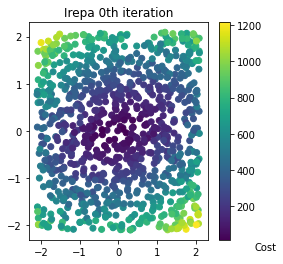

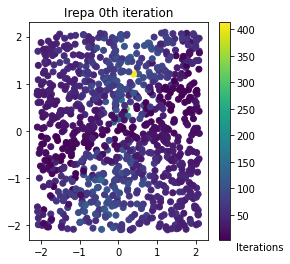

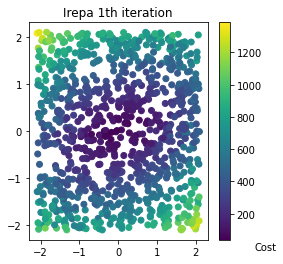

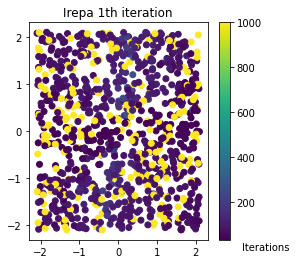

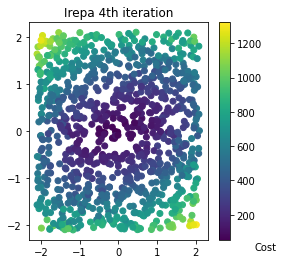

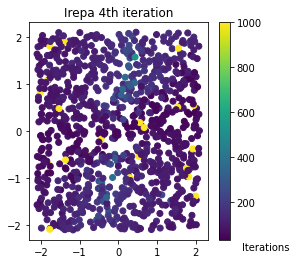

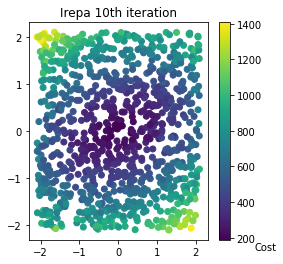

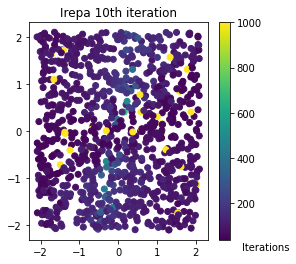

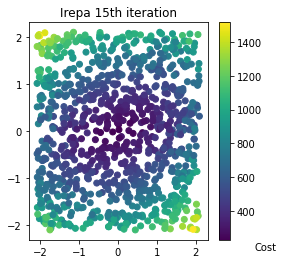

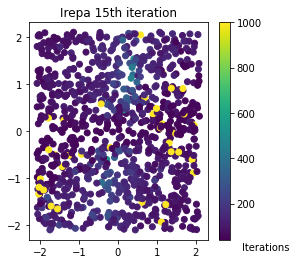

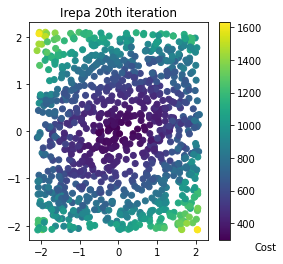

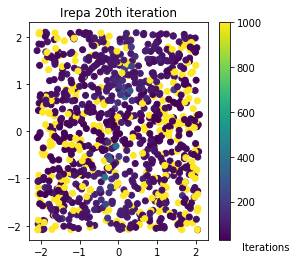

In [13]:
scatter_cost(data, n = 0)
scatter_iters(data, n = 0)

scatter_cost(run1, n = 1)
scatter_iters(run1, n = 1)

scatter_cost(run4, n = 4)
scatter_iters(run4, n = 4)

scatter_cost(run10, n = 10)
scatter_iters(run10, n = 10)

scatter_cost(run15, n = 15)
scatter_iters(run15, n = 15)

scatter_cost(run20, n = 20)
scatter_iters(run20, n = 20)